In [1]:
import grid2op
from tqdm.notebook import tqdm  # for easy progress bar
display_tqdm = False  # this is set to False for ease with the unitt test, feel free to set it to True
from grid2op.PlotGrid import PlotMatplot

In [2]:
env = grid2op.make("rte_case5_example", test=True)

C:\Users\Alex Guerra\Anaconda3\lib\site-packages\grid2op\MakeEnv\Make.py:317: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


In [3]:
plot_helper = PlotMatplot(env.observation_space)

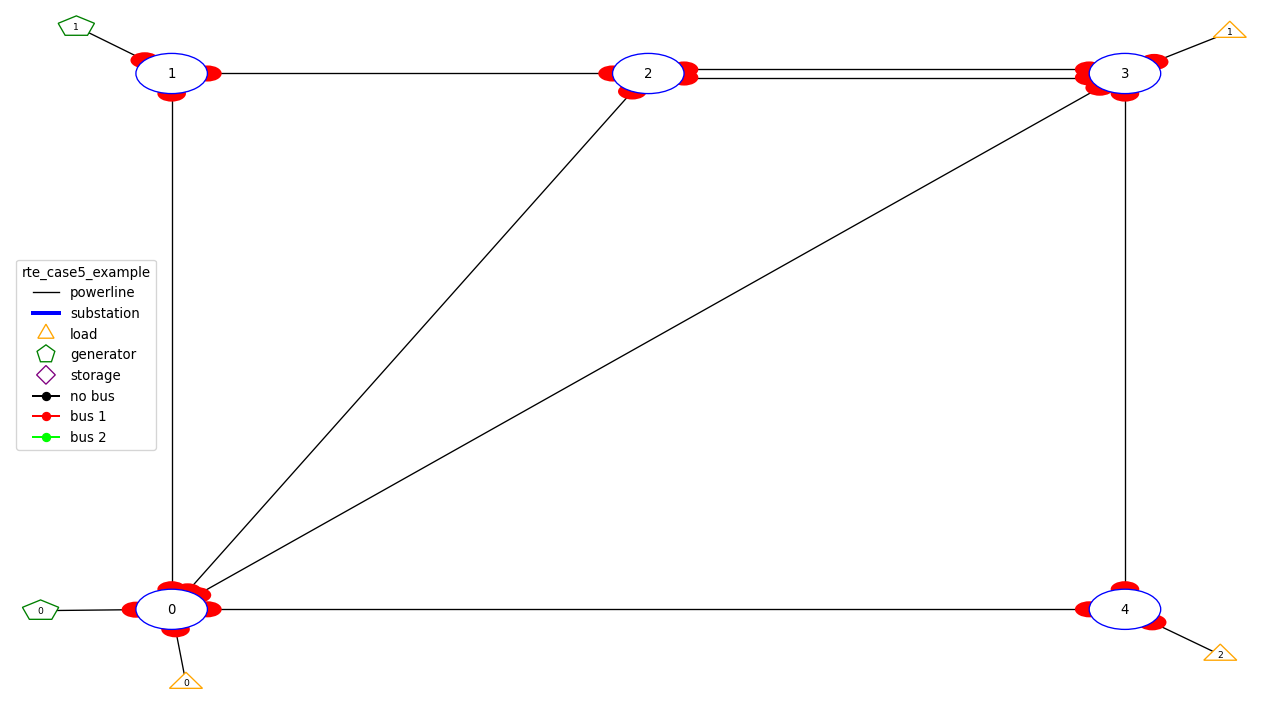

In [4]:
# plot the graph layout
fig = plot_helper.plot_layout()

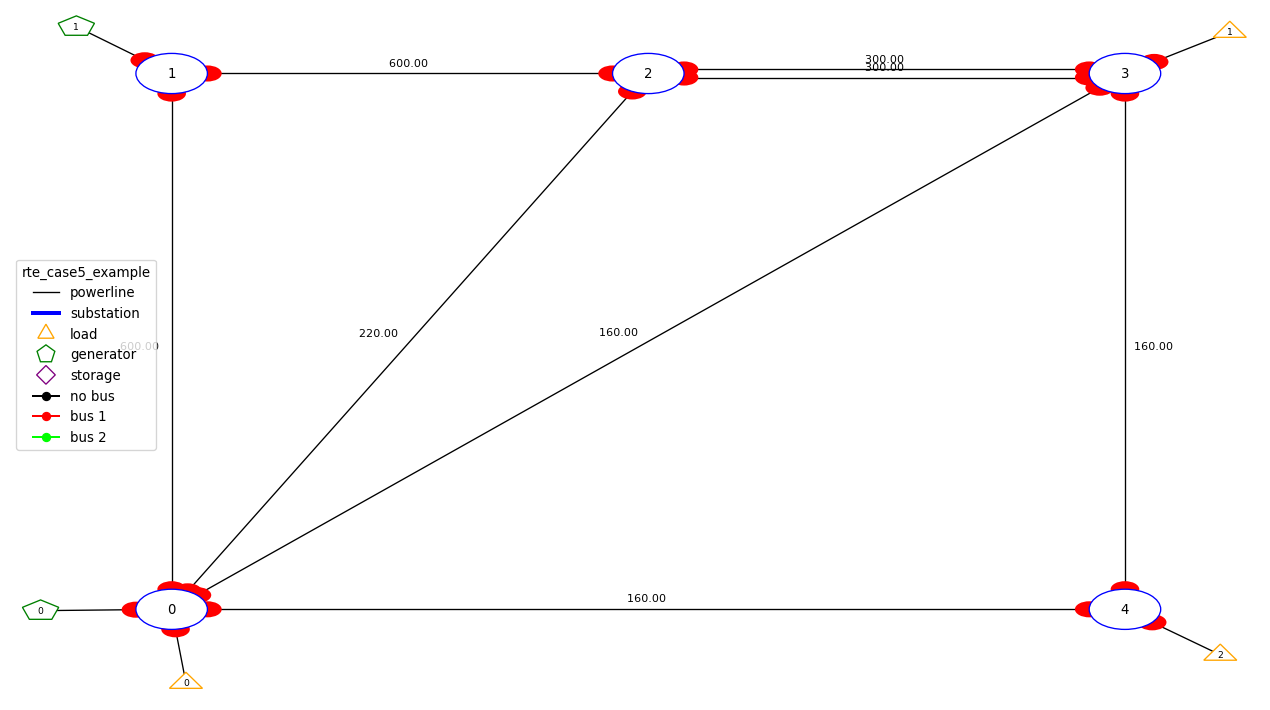

In [5]:
# plot the thermal limit of the lines on the powergrid.
_ = plot_helper.plot_info(line_values=env._thermal_limit_a)

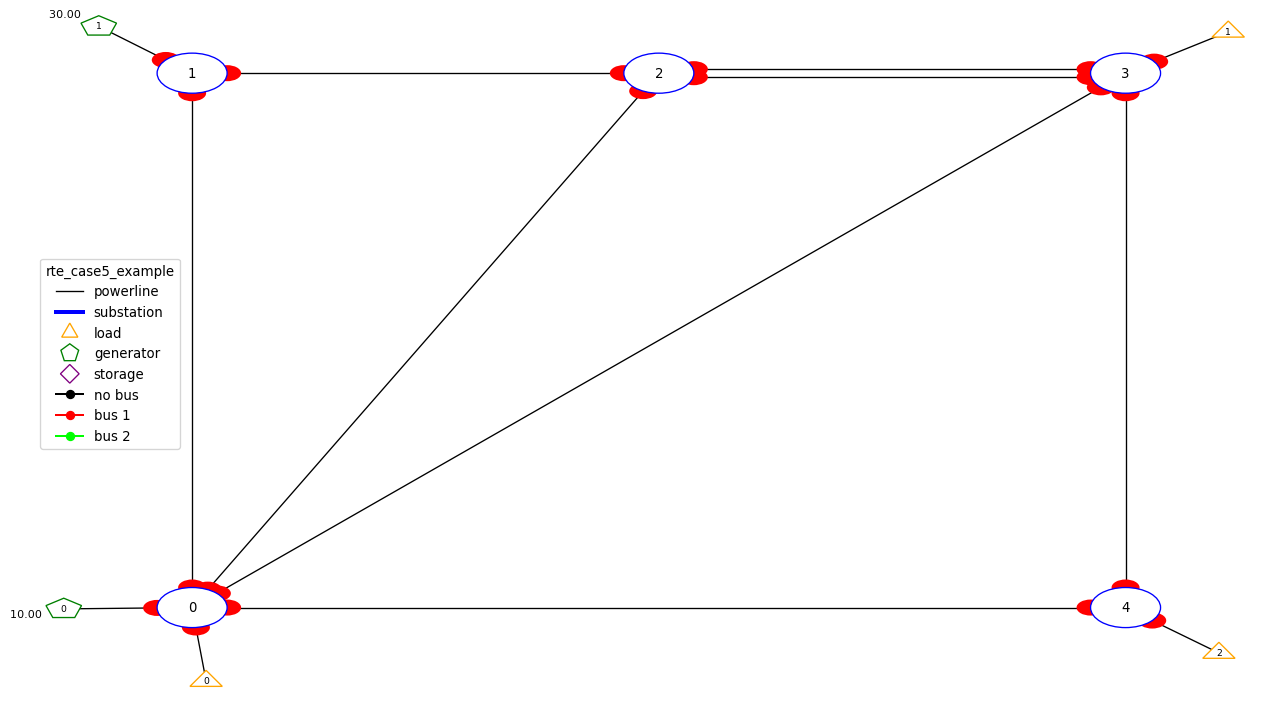

In [6]:
# Plot the maximum power the generators can produce.
_ = plot_helper.plot_info(gen_values=env.gen_pmax)

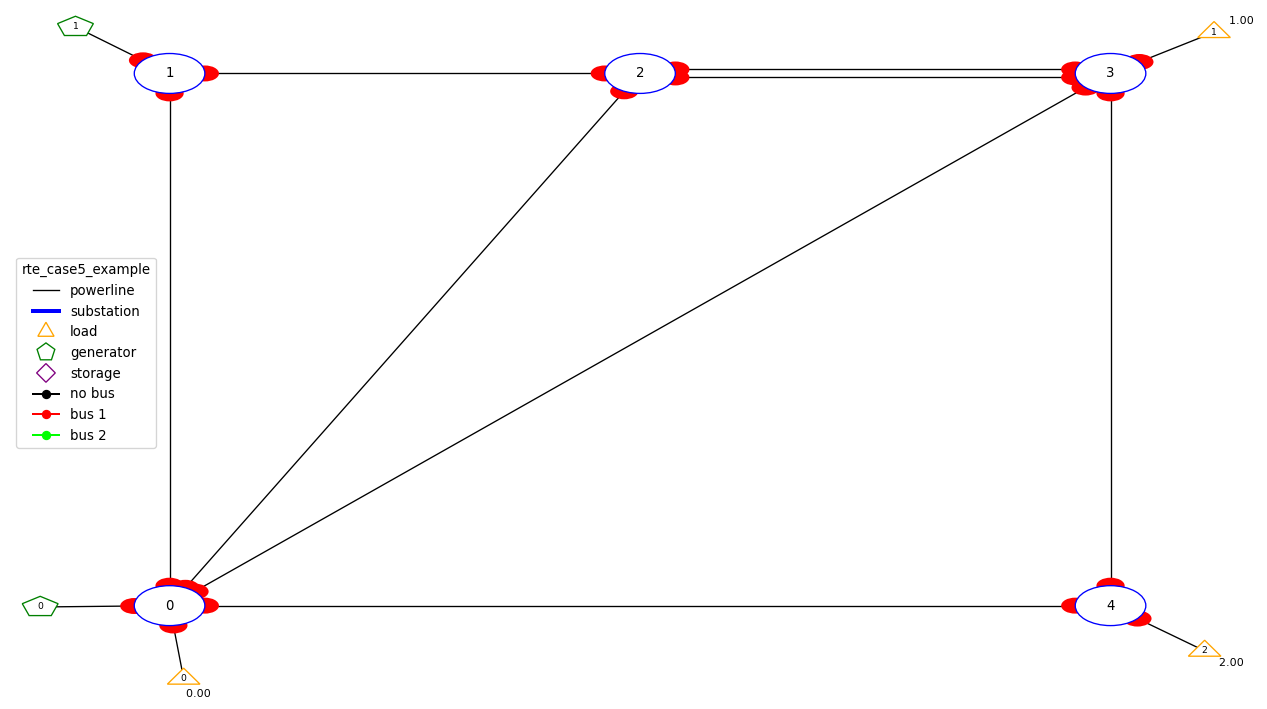

In [7]:
# Label the loads by id
_ = plot_helper.plot_info(load_values=[el for el in range(env.n_load)])

In [28]:
agents = [DoNothingAgent(env.action_space), RecoPowerlineAgent(env.action_space), TopologyGreedy(env.action_space),
         PowerLineSwitch(env.action_space)]
envs = []

In [33]:
# Bringing in an example agent
from grid2op.Agent import DoNothingAgent, RecoPowerlineAgent, TopologyGreedy, PowerLineSwitch

# Run the standard gym loop, saving the observations
agents = [DoNothingAgent(env.action_space), RecoPowerlineAgent(env.action_space), TopologyGreedy(env.action_space),
         PowerLineSwitch(env.action_space)]

master_list = []
nb_steps = []
for agent in agents[2:]:
    all_obs = []
    obs = env.reset()
    all_obs.append(obs)
    reward = env.reward_range[0]
    done = False
    nb_step = 0
    with tqdm(total=env.chronics_handler.max_timestep(), disable=not display_tqdm) as pbar:
        while True:
            print(nb_step)
            action = agent.act(obs, reward, done)
            obs, reward, done, _ = env.step(action)
            #print(reward)
            pbar.update(1)
            if done:
                nb_steps.append(nb_step)
                break
            all_obs.append(obs)
            nb_step += 1

0
0
1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

In [31]:
#print("Number of timesteps computed: {}".format(nb_step))
#print("Total maximum number of timesteps possible: {}".format(env.chronics_handler.max_timestep()))
print(nb_steps)

[524, 446, 2015, 2015]


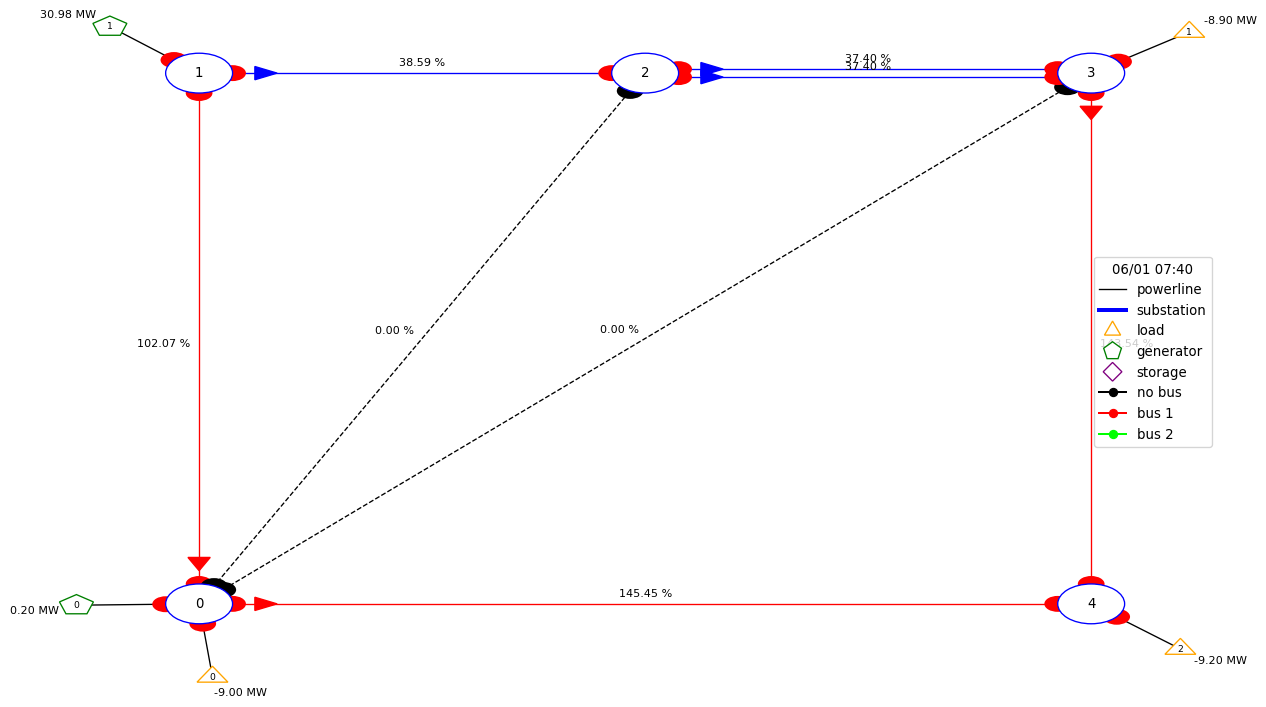

In [15]:
# To see what went wrong, we look at the last observation
last_obs = all_obs[-1]
_ = plot_helper.plot_obs(last_obs)